In [1]:
import numpy as np
import pandas as pd

from lets_plot import *


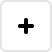
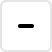
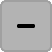
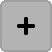
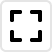
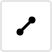
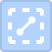
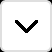
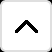
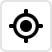
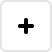
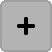
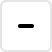
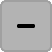
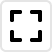
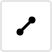
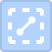
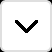
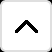
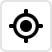

In [2]:
LetsPlot.setup_html()

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/iris.csv")
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
p = ggplot(df, aes("species", "sepal_length")) + geom_violin(size=0, fill="#dddddd") + scale_color_discrete(guide='none')
params = {'mapping': aes(color="sepal_length"), 'seed': 42}

gggrid([
    p + geom_sina(**params) + ggtitle("Default"),
    p + geom_sina(jitter_y=True, **params) + ggtitle("jitter_y=True"),
    p + geom_sina(position=position_jitterdodge(jitter_width=0, jitter_height=.25, seed=42), **params) + ggtitle("position='jitterdodge'"),
]) + ggsize(1000, 600)

In [5]:
def get_data(m, n):
    return pd.DataFrame({
        'x': np.random.choice(['a', 'b'], size=n),
        'y': np.random.randint(m, size=n),
        'g': np.random.choice(['g1', 'g2'], size=n),
    })

data = get_data(10, 2_000)
print(data.shape)
data.head()

(2000, 3)


,x,y,g
0,a,2,g1
1,a,4,g1
2,b,1,g2
3,a,1,g1
4,b,2,g1


In [6]:
p = ggplot(data, aes("x", "y", fill="g")) + geom_violin(width=.5, size=0, alpha=.5) + scale_color_discrete(guide='none')
params = {'seed': 42, 'width': .5}

gggrid([
    p + geom_sina(**params) + ggtitle("Default"),
    p + geom_sina(jitter_y=True, **params) + ggtitle("jitter_y=True"),
    p + geom_sina(position=position_jitter(width=0, height=.25, seed=42), **params) + ggtitle("position='jitter'"),
    p + geom_sina(position=position_jitterdodge(dodge_width=.95, jitter_width=0, jitter_height=.25, seed=42), **params) + ggtitle("position='jitterdodge'"),
], ncol=2) + ggsize(1000, 800)